<a href="https://colab.research.google.com/github/Bensemilla/techlabs_group_3_clownfishes/blob/main/timeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("charging_data.csv")

In [ ]:
#INFO 1 ----------

#The number of charging stations through the years

df[["Jahr", "Monat","Tag"]] = df["inbetriebnahmedatum"].str.split("-",expand=True)

In [ ]:
df.groupby("Jahr")["anzahl_ladepunkte"].sum()

Jahr
1992        1
2001        3
2007        3
2008        2
2009      103
2010      142
2011      402
2012      360
2013      262
2014      494
2015     1027
2016     2224
2017     3677
2018     7487
2019     9499
2020    10707
2021    14817
2022    17837
2023     2216
Name: anzahl_ladepunkte, dtype: int64

In [ ]:
#Question: Why did it stop growing from 2022 to 2023? Is this the same behaviour for all betreiber?

In [ ]:
#INFO 2 ----------

#Time series forecasting - is the task of predicting future values based on historical data. Here I need to decide on a forecasting model.
#My idea is to use ARIMA model. https://www.kdnuggets.com/2023/08/times-series-analysis-arima-models-python.html



In [ ]:
#INFO 3 ----------

#Here I tried to make a Pareto Chart of the 20% Companies that have 80% of the total number of charging stations

#Import libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [42]:
#create a new df with only the data I need
newdf = df.groupby("betreiber")["anzahl_ladepunkte"].sum().sort_values(ascending=False).to_frame()

In [49]:
#print(newdf)

In [43]:
newdf.transpose()

betreiber,EnBW mobility+ AG und Co.KG,E.ON Drive GmbH,EWE Go GmbH,Mercedes-Benz AG,Westenergie Metering GmbH,Stromnetz Hamburg GmbH,ALDI SÜD,SWM Versorgungs GmbH,Lidl,Allego GmbH,...,Paul Klingelhöfer GmbH,Autohaus Oelmaier GmbH,Gemeindewerke Halstenbek,Autohaus Nobis e.K.,Autohaus Müller Wurzen GmbH,Autohaus Müller Reudnitz GmbH,Genusshotel Wenisch GmbH & Co. KG,Geo4mation GmbH,Gerald Bartke GmbH,Citropart
anzahl_ladepunkte,4064,2789,1806,1621,1514,1410,1223,1196,1134,1081,...,1,1,1,1,1,1,1,1,1,1


In [44]:
newdf["cum_percentage"] = round(newdf["anzahl_ladepunkte"].cumsum()/newdf["anzahl_ladepunkte"].sum()*100,2)

In [45]:
print(newdf)

                                   anzahl_ladepunkte  cum_percentage
betreiber                                                           
EnBW mobility+ AG und Co.KG                     4064            5.70
E.ON Drive GmbH                                 2789            9.62
EWE Go GmbH                                     1806           12.15
Mercedes-Benz AG                                1621           14.43
Westenergie Metering GmbH                       1514           16.55
...                                              ...             ...
Autohaus Müller Reudnitz GmbH                      1           99.99
Genusshotel Wenisch GmbH & Co. KG                  1          100.00
Geo4mation GmbH                                    1          100.00
Gerald Bartke GmbH                                 1          100.00
Citropart                                          1          100.00

[4772 rows x 2 columns]


In [46]:
#An idea to make the chart look better could be to clean the df, get rid of all the data after the cumulative percentage hits 100.

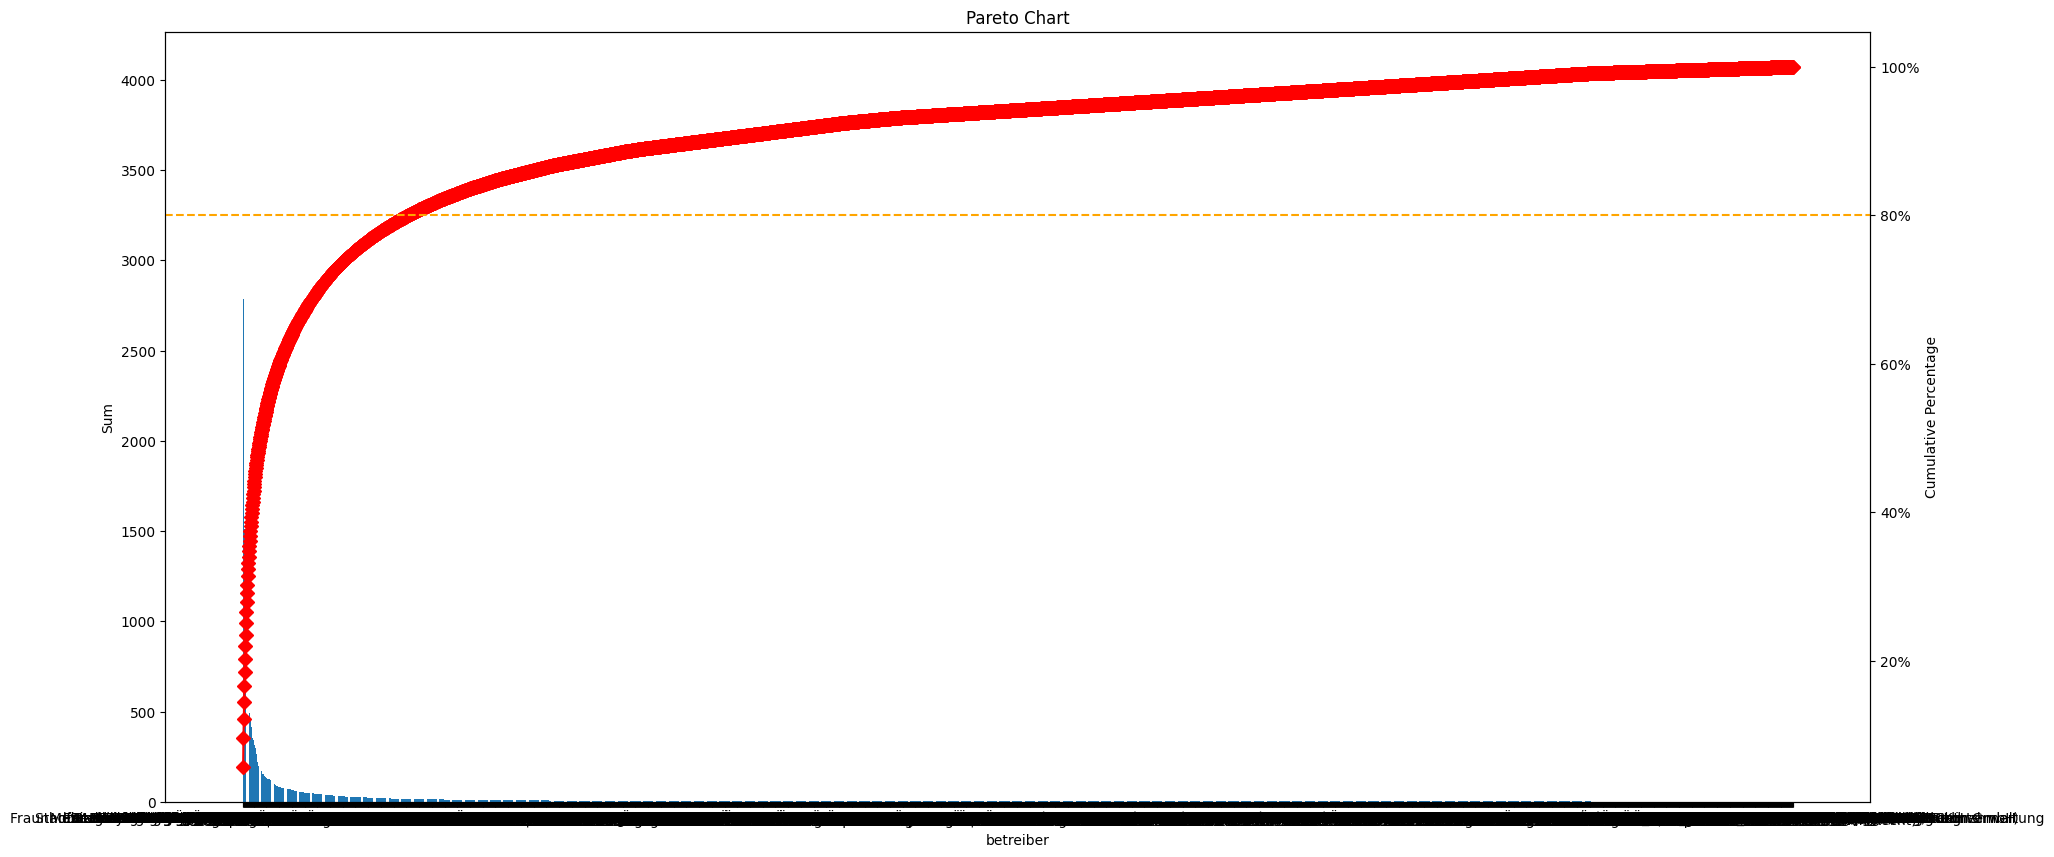

In [48]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(newdf.index, newdf["anzahl_ladepunkte"])
ax.set_title("Pareto Chart")
ax.set_xlabel("betreiber")
ax.set_ylabel("Sum");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(newdf.index, newdf["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

In [ ]:
#INFO 4 ----------

#This was an attempt to get an overview of how the companies increase the number of stations through the years.
#I would try to do it again but only with the 20%

df.pivot_table('anzahl_ladepunkte', ['Jahr', 'betreiber'], aggfunc='sum')

anzahl_ladepunkte
Jahr betreiber                                                            
1992 Ladestation Berglen Öschelbronn                                     1
2001 Strähle Galvanik GmbH                                               3
2007 IBH GmbH                                                            1
     Stadtwerke Ludwigslust-Grabow GmbH                                  2
2008 EGT Energie GmbH                                                    2
...                                                                    ...
2023 ratioplan GmbH                                                      3
     schutti-solar                                                       1
     smopi®                                                              4
     ubitricity Gesellschaft für verteilte Energiesy...                131
     ÜZ Mainfranken eG                                                   3

[7336 rows x 1 columns]

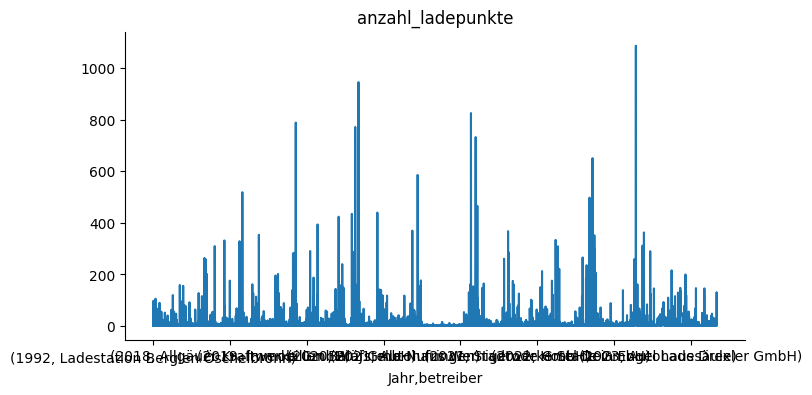

In [ ]:
from matplotlib import pyplot as plt
_df_3['anzahl_ladepunkte'].plot(kind='line', figsize=(8, 4), title='anzahl_ladepunkte')
plt.gca().spines[['top', 'right']].set_visible(False)